In [1]:
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show)
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore

In [9]:
mat_data = loadmat('data/wine.mat')
print(mat_data)
X = mat_data['X']
y = mat_data['y'].squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]
attributeNames = [name[0][0] for name in mat_data['attributeNames']]
attributeNames

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Sep 16 11:14:52 2011', '__version__': '1.0', '__globals__': [], 'X': array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]]), 'attributeNames': array([[array(['Fixed acidity'], dtype='<U13')],
       [array(['Volatile acidity'], dtype='<U16')],
       [array(['Citric acid'], dtype='<U11')],
       [array(['Residual sugar'], dtype='<U14')],
       [array(['Chlorides'], dtype='<U9')],
       [array(['Free sulfur dioxide'], dtype='<U19')],
       [array(['Total sulfur dioxide'], dtype='<U20')],
       [array(['Density'], dtype='<U7')],
       [array(['pH'], dtype='<U2')],
       [array(['Sulphates'], dtype='<U9')],
       [array(

['Fixed acidity',
 'Volatile acidity',
 'Citric acid',
 'Residual sugar',
 'Chlorides',
 'Free sulfur dioxide',
 'Total sulfur dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol',
 'Quality score (0--10)']

In [5]:
classNames = [cls[0][0] for cls in mat_data['classNames']]
classNames

['Red']

([<matplotlib.axis.XTick at 0x7f34a4c0e380>,
 [Text(1, 0, 'Fixed acidity'),
  Text(2, 0, 'Volatile acidity'),
  Text(3, 0, 'Citric acid'),
  Text(4, 0, 'Residual sugar'),
  Text(5, 0, 'Chlorides'),
  Text(6, 0, 'Free sulfur dioxide'),
  Text(7, 0, 'Total sulfur dioxide'),
  Text(8, 0, 'Density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'Sulphates'),
  Text(11, 0, 'Alcohol'),
  Text(12, 0, 'Quality score (0--10)')])

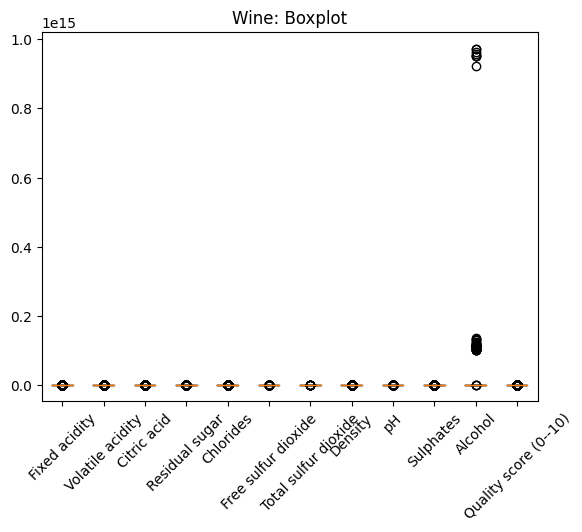

In [11]:
figure()
title('Wine: Boxplot')
boxplot(X)
xticks(range(1,M+1), attributeNames, rotation=45)

([<matplotlib.axis.XTick at 0x7f34a4b6e530>,
 [Text(1, 0, 'Fixed acidity'),
  Text(2, 0, 'Volatile acidity'),
  Text(3, 0, 'Citric acid'),
  Text(4, 0, 'Residual sugar'),
  Text(5, 0, 'Chlorides'),
  Text(6, 0, 'Free sulfur dioxide'),
  Text(7, 0, 'Total sulfur dioxide'),
  Text(8, 0, 'Density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'Sulphates'),
  Text(11, 0, 'Alcohol'),
  Text(12, 0, 'Quality score (0--10)')])

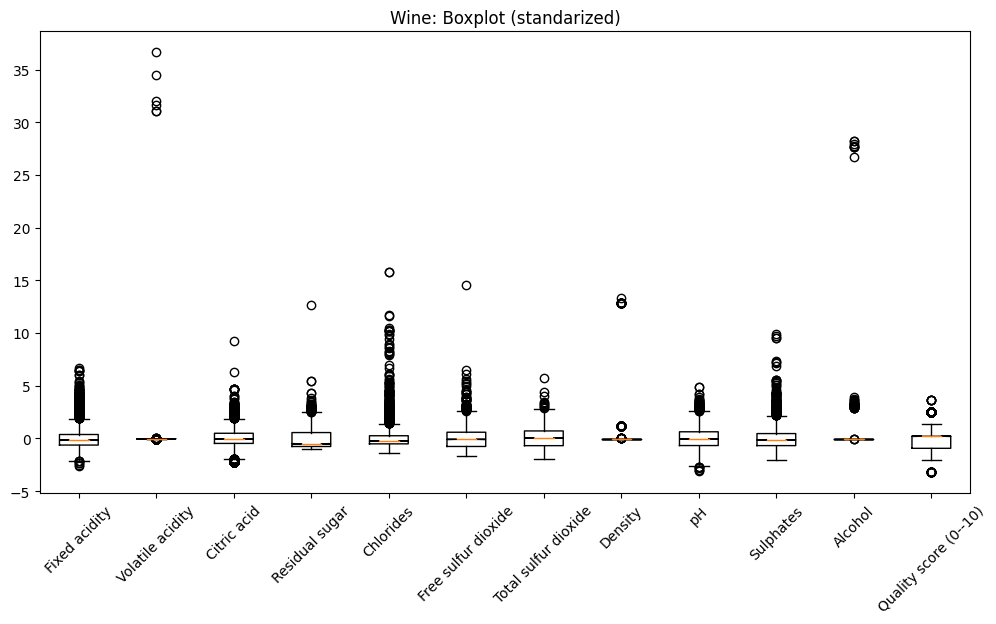

In [12]:
figure(figsize=(12,6))
title('Wine: Boxplot (standarized)')
boxplot(zscore(X, ddof=1), attributeNames)
xticks(range(1,M+1), attributeNames, rotation=45)

In [14]:
figure(figsize=(14,9))

<Figure size 1400x900 with 0 Axes>

<Figure size 1400x900 with 0 Axes>

In [19]:
M

12

In [32]:
N

6497

In [33]:
u = int(np.floor(np.sqrt(M)))
u

3

In [34]:
v = int(np.ceil(float(M)/u))
v

4

In [35]:
X[:]

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

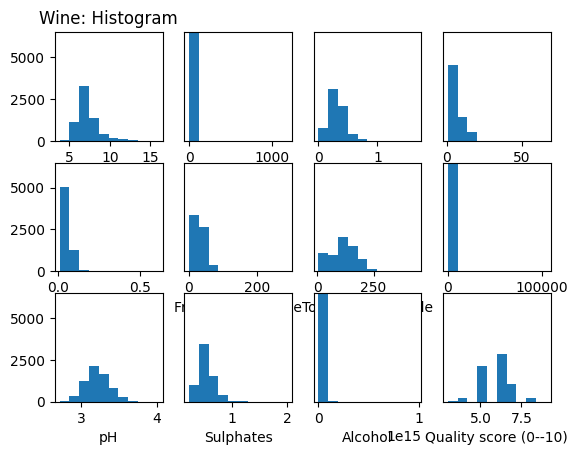

In [37]:
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i])
    xlabel(attributeNames[i])
    ylim(0, N)
    if i%v!=0: 
        yticks([])
    if i==0: 
        title('Wine: Histogram')

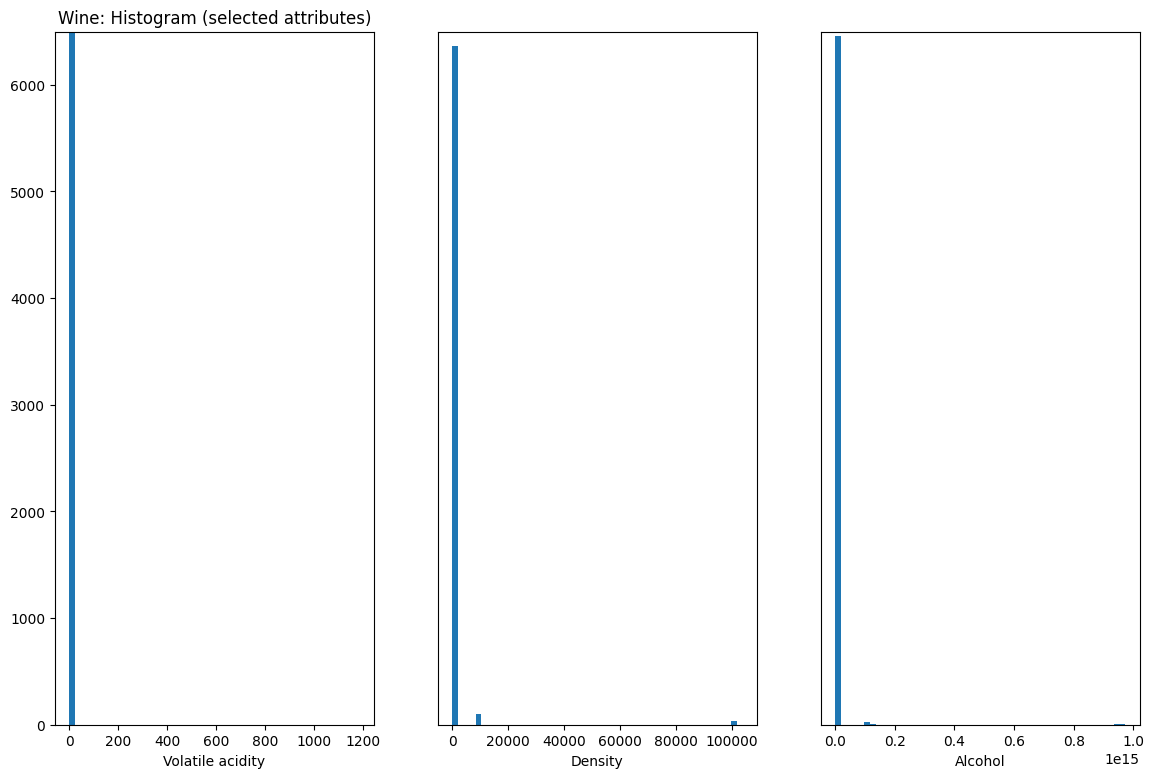

In [38]:
figure(figsize=(14,9))
m = [1, 7, 10]
for i in range(len(m)):
    subplot(1,len(m),i+1)
    hist(X[:,m[i]],50)
    xlabel(attributeNames[m[i]])
    ylim(0, N)
    if i>0: yticks([])
    if i==0: title('Wine: Histogram (selected attributes)')


In [43]:
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
print(outlier_mask)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]
N = len(y)

[False False False ... False False False]


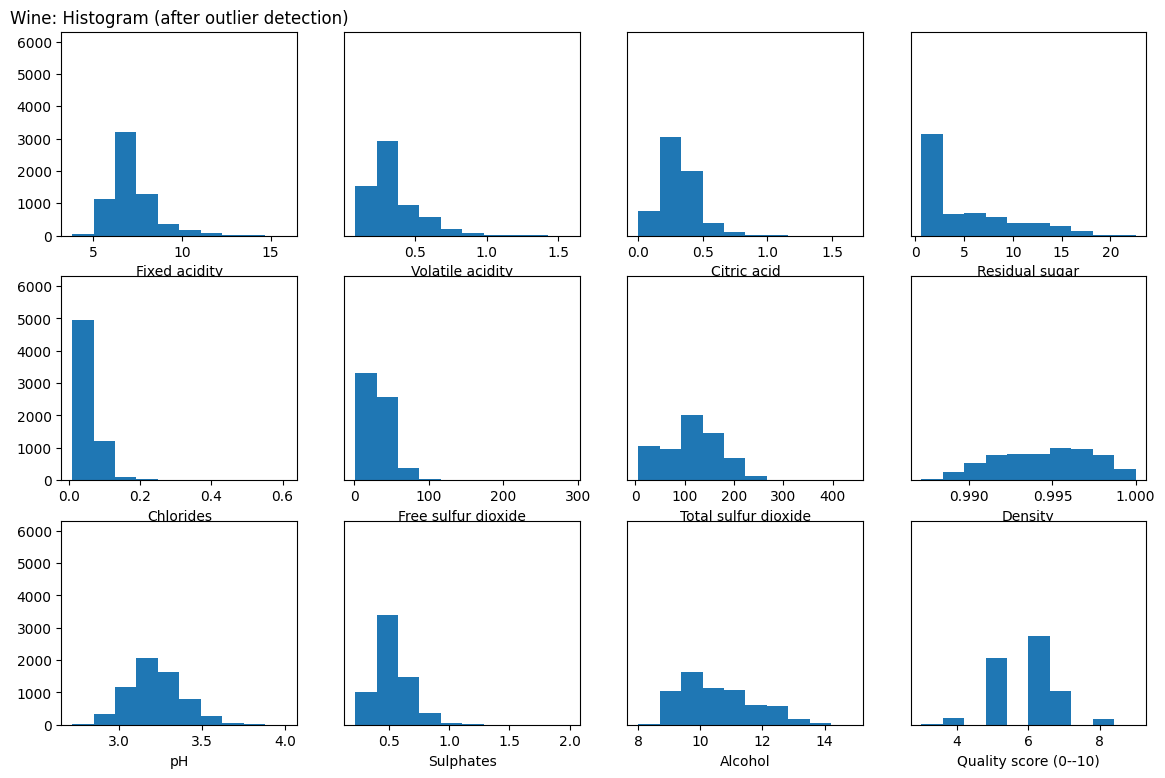

In [41]:
figure(figsize=(14,9))
u = int(np.floor(np.sqrt(M))); 
v = int(np.ceil(float(M)/u))
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i])
    xlabel(attributeNames[i])
    ylim(0, N)
    if i%v!=0: yticks([])
    if i==0: title('Wine: Histogram (after outlier detection)')

In [42]:
show()